In [2]:
pwd()

'C:\\Users\\Flora'

In [4]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('F:\second_term\ADS\proj3\Train.csv')
test = pd.read_csv('F:\second_term\ADS\proj3\Test.csv')
target = 'y' #this is y
IDcol = 'ID'

In [7]:
#Functions for building the model
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['y'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    dtest_predictions = alg.predict(dtest[predictors])
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['y'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy(train): %.4g" % metrics.accuracy_score(dtrain['y'].values, dtrain_predictions))
    print ("Accuracy(test) : %.4g" % metrics.accuracy_score(dtest['y'].values, dtest_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')



Model Report
Accuracy(train): 0.8013
Accuracy(test) : 0.735
AUC Score (Train): 0.890415
CV Score : Mean - 0.8012044 | Std - 0.02676981 | Min - 0.7726172 | Max - 0.8381641


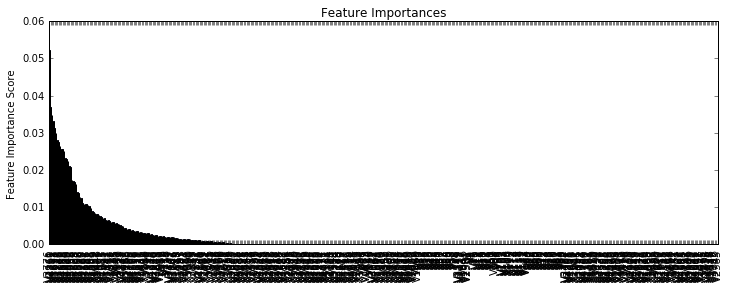

In [30]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
#initial estimates:
#min_samples_split = 200 : This should be ~0.5-1% of total values.
#min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
#max_depth = 1 : for decision stump
#max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
#subsample = 0.8 : This is a commonly-used start value
#n_estimators=100 : Can be selected based on intuition.
#max_features= "sqrt": typical sqrt to 30-40% of total features

#This is the untuned baseline, the parameters are not necesarily the best.
gbm0 = GradientBoostingClassifier(random_state=10,loss = 'exponential',
                                  learning_rate=0.001, 
                                  min_samples_split = 50,
                                  min_samples_leaf = 70,
                                  max_depth = None,
                                  subsample=0.8,
                                  n_estimators=40,
                                  max_features=17)
modelfit(gbm0, train, test,predictors)#train 80% test 73.5%


Model Report
Accuracy(train): 0.7856
Accuracy(test) : 0.735
AUC Score (Train): 0.874934
CV Score : Mean - 0.7951245 | Std - 0.02289239 | Min - 0.755625 | Max - 0.8208984
10

Model Report
Accuracy(train): 0.7956
Accuracy(test) : 0.7475
AUC Score (Train): 0.880778
CV Score : Mean - 0.7987926 | Std - 0.02982545 | Min - 0.7523828 | Max - 0.8312112
15

Model Report
Accuracy(train): 0.805
Accuracy(test) : 0.7425
AUC Score (Train): 0.893800
CV Score : Mean - 0.8057346 | Std - 0.01853201 | Min - 0.7774219 | Max - 0.8323047
20

Model Report
Accuracy(train): 0.8037
Accuracy(test) : 0.7425
AUC Score (Train): 0.894951
CV Score : Mean - 0.8078883 | Std - 0.01294953 | Min - 0.7923828 | Max - 0.8295807
25


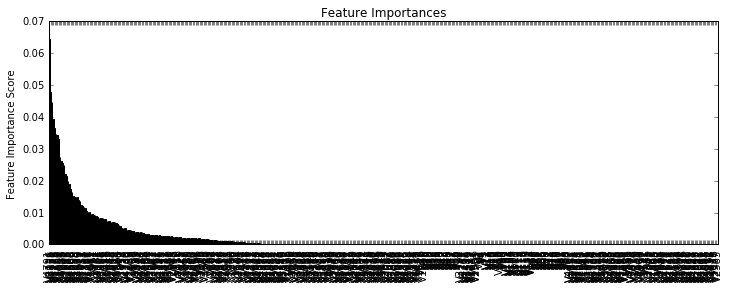

In [40]:
for a in range(10,26,5):
    gbm0 = GradientBoostingClassifier(random_state=100,loss = 'exponential',
                                  learning_rate=0.001, 
                                  min_samples_split = 50,
                                  min_samples_leaf = 70,
                                  max_depth = None,
                                  subsample=0.8,
                                  n_estimators=50,
                                  max_features=a)
    modelfit(gbm0, train, test,predictors)    #Train 80% Test 75.5%
    print(a)
    
#max_features = 20


Model Report
Accuracy(train): 0.805
Accuracy(test) : 0.7425
AUC Score (Train): 0.893800
CV Score : Mean - 0.8057346 | Std - 0.01853201 | Min - 0.7774219 | Max - 0.8323047
70

Model Report
Accuracy(train): 0.8044
Accuracy(test) : 0.74
AUC Score (Train): 0.893164
CV Score : Mean - 0.8048294 | Std - 0.01800628 | Min - 0.7766016 | Max - 0.8309766


KeyboardInterrupt: 

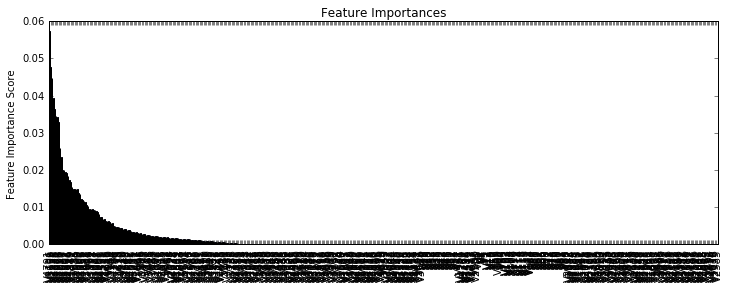

In [55]:
for a in range(70,85):
    gbm0 = GradientBoostingClassifier(random_state=100,loss = 'exponential',
                                  learning_rate=0.001, 
                                  min_samples_split = 50,
                                  min_samples_leaf = a,
                                  max_depth = None,
                                  subsample=0.8,
                                  n_estimators=50,
                                  max_features=20)
    modelfit(gbm0, train, test,predictors)    #Train 80% Test 75.5%
    print(a)
    
#min_samples_leaf = 80


Model Report
Accuracy(train): 0.7975
Accuracy(test) : 0.735
AUC Score (Train): 0.885439
CV Score : Mean - 0.8081901 | Std - 0.0213408 | Min - 0.7745313 | Max - 0.8350543
30

Model Report
Accuracy(train): 0.7975
Accuracy(test) : 0.735
AUC Score (Train): 0.885439
CV Score : Mean - 0.8081901 | Std - 0.0213408 | Min - 0.7745313 | Max - 0.8350543
35

Model Report
Accuracy(train): 0.7975
Accuracy(test) : 0.735
AUC Score (Train): 0.885439
CV Score : Mean - 0.8081901 | Std - 0.0213408 | Min - 0.7745313 | Max - 0.8350543
40


KeyboardInterrupt: 

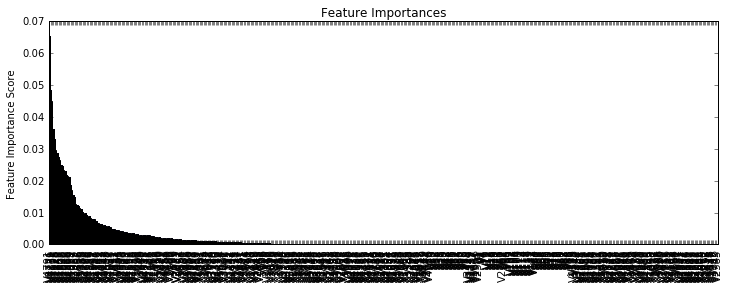

In [61]:
for a in range(30,65,5):
    gbm0 = GradientBoostingClassifier(random_state=10,loss = 'exponential',
                                  learning_rate=0.001, 
                                  min_samples_split = 50,
                                  min_samples_leaf = 80,
                                  max_depth = None,
                                  subsample=0.8,
                                  n_estimators=a,
                                  max_features=20)
    modelfit(gbm0, train, test,predictors)    #Train 79% Test 75.75%
    print(a)
#n_estimators = 35

In [ ]:
#Tuned GB_Tree
GB_TREE = GradientBoostingClassifier(random_state=10,loss = 'exponential',
                                  learning_rate=0.001, 
                                  min_samples_split = 50,
                                  min_samples_leaf = 80,
                                  max_depth = None,
                                  subsample=0.8,
                                  n_estimators=a,
                                  max_features=20)
modelfit(GB_TREE, train, test,predictors)    #Train 79% Test 75.75%
